<a href="https://colab.research.google.com/github/Raajarapu/COLAB_practice/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

## The objective of this project is to develop a model to predict wine quality based on its physicochemical properties, with a particular focus on the alcohol content. Using the Wine Quality dataset, we aim to perform thorough data analysis, build predictive models, and evaluate their effectiveness in classifying wine quality.

### Imorting required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# loading the dataset
df3 = pd.read_csv("winequality-red.csv")
df3

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [ ]:
df3.head()

fixed acidity  volatile acidity  citric acid  residual sugar  ...    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9  ...  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6  ...  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3  ...  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9  ...  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9  ...  3.51       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
df3.tail()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[5 rows x 12 columns]

In [ ]:
df3.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df3.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df3.shape

(1599, 12)

In [ ]:
df3.describe().T

count       mean        std  ...       50%        75%        max
fixed acidity         1599.0   8.319637   1.741096  ...   7.90000   9.200000   15.90000
volatile acidity      1599.0   0.527821   0.179060  ...   0.52000   0.640000    1.58000
citric acid           1599.0   0.270976   0.194801  ...   0.26000   0.420000    1.00000
residual sugar        1599.0   2.538806   1.409928  ...   2.20000   2.600000   15.50000
chlorides             1599.0   0.087467   0.047065  ...   0.07900   0.090000    0.61100
free sulfur dioxide   1599.0  15.874922  10.460157  ...  14.00000  21.000000   72.00000
total sulfur dioxide  1599.0  46.467792  32.895324  ...  38.00000  62.000000  289.00000
density               1599.0   0.996747   0.001887  ...   0.99675   0.997835    1.00369
pH                    1599.0   3.311113   0.154386  ...   3.31000   3.400000    4.01000
sulphates             1599.0   0.658149   0.169507  ...   0.62000   0.730000    2.00000
alcohol               1599.0  10.422983   1.065668  ...  10.20000  11.100000   14.90000
quality               1599.0   5.636023   0.807569  ...   6.00000   6.000000    8.00000

[12 rows x 8 columns]

# (EDA) Exploratory data analysis


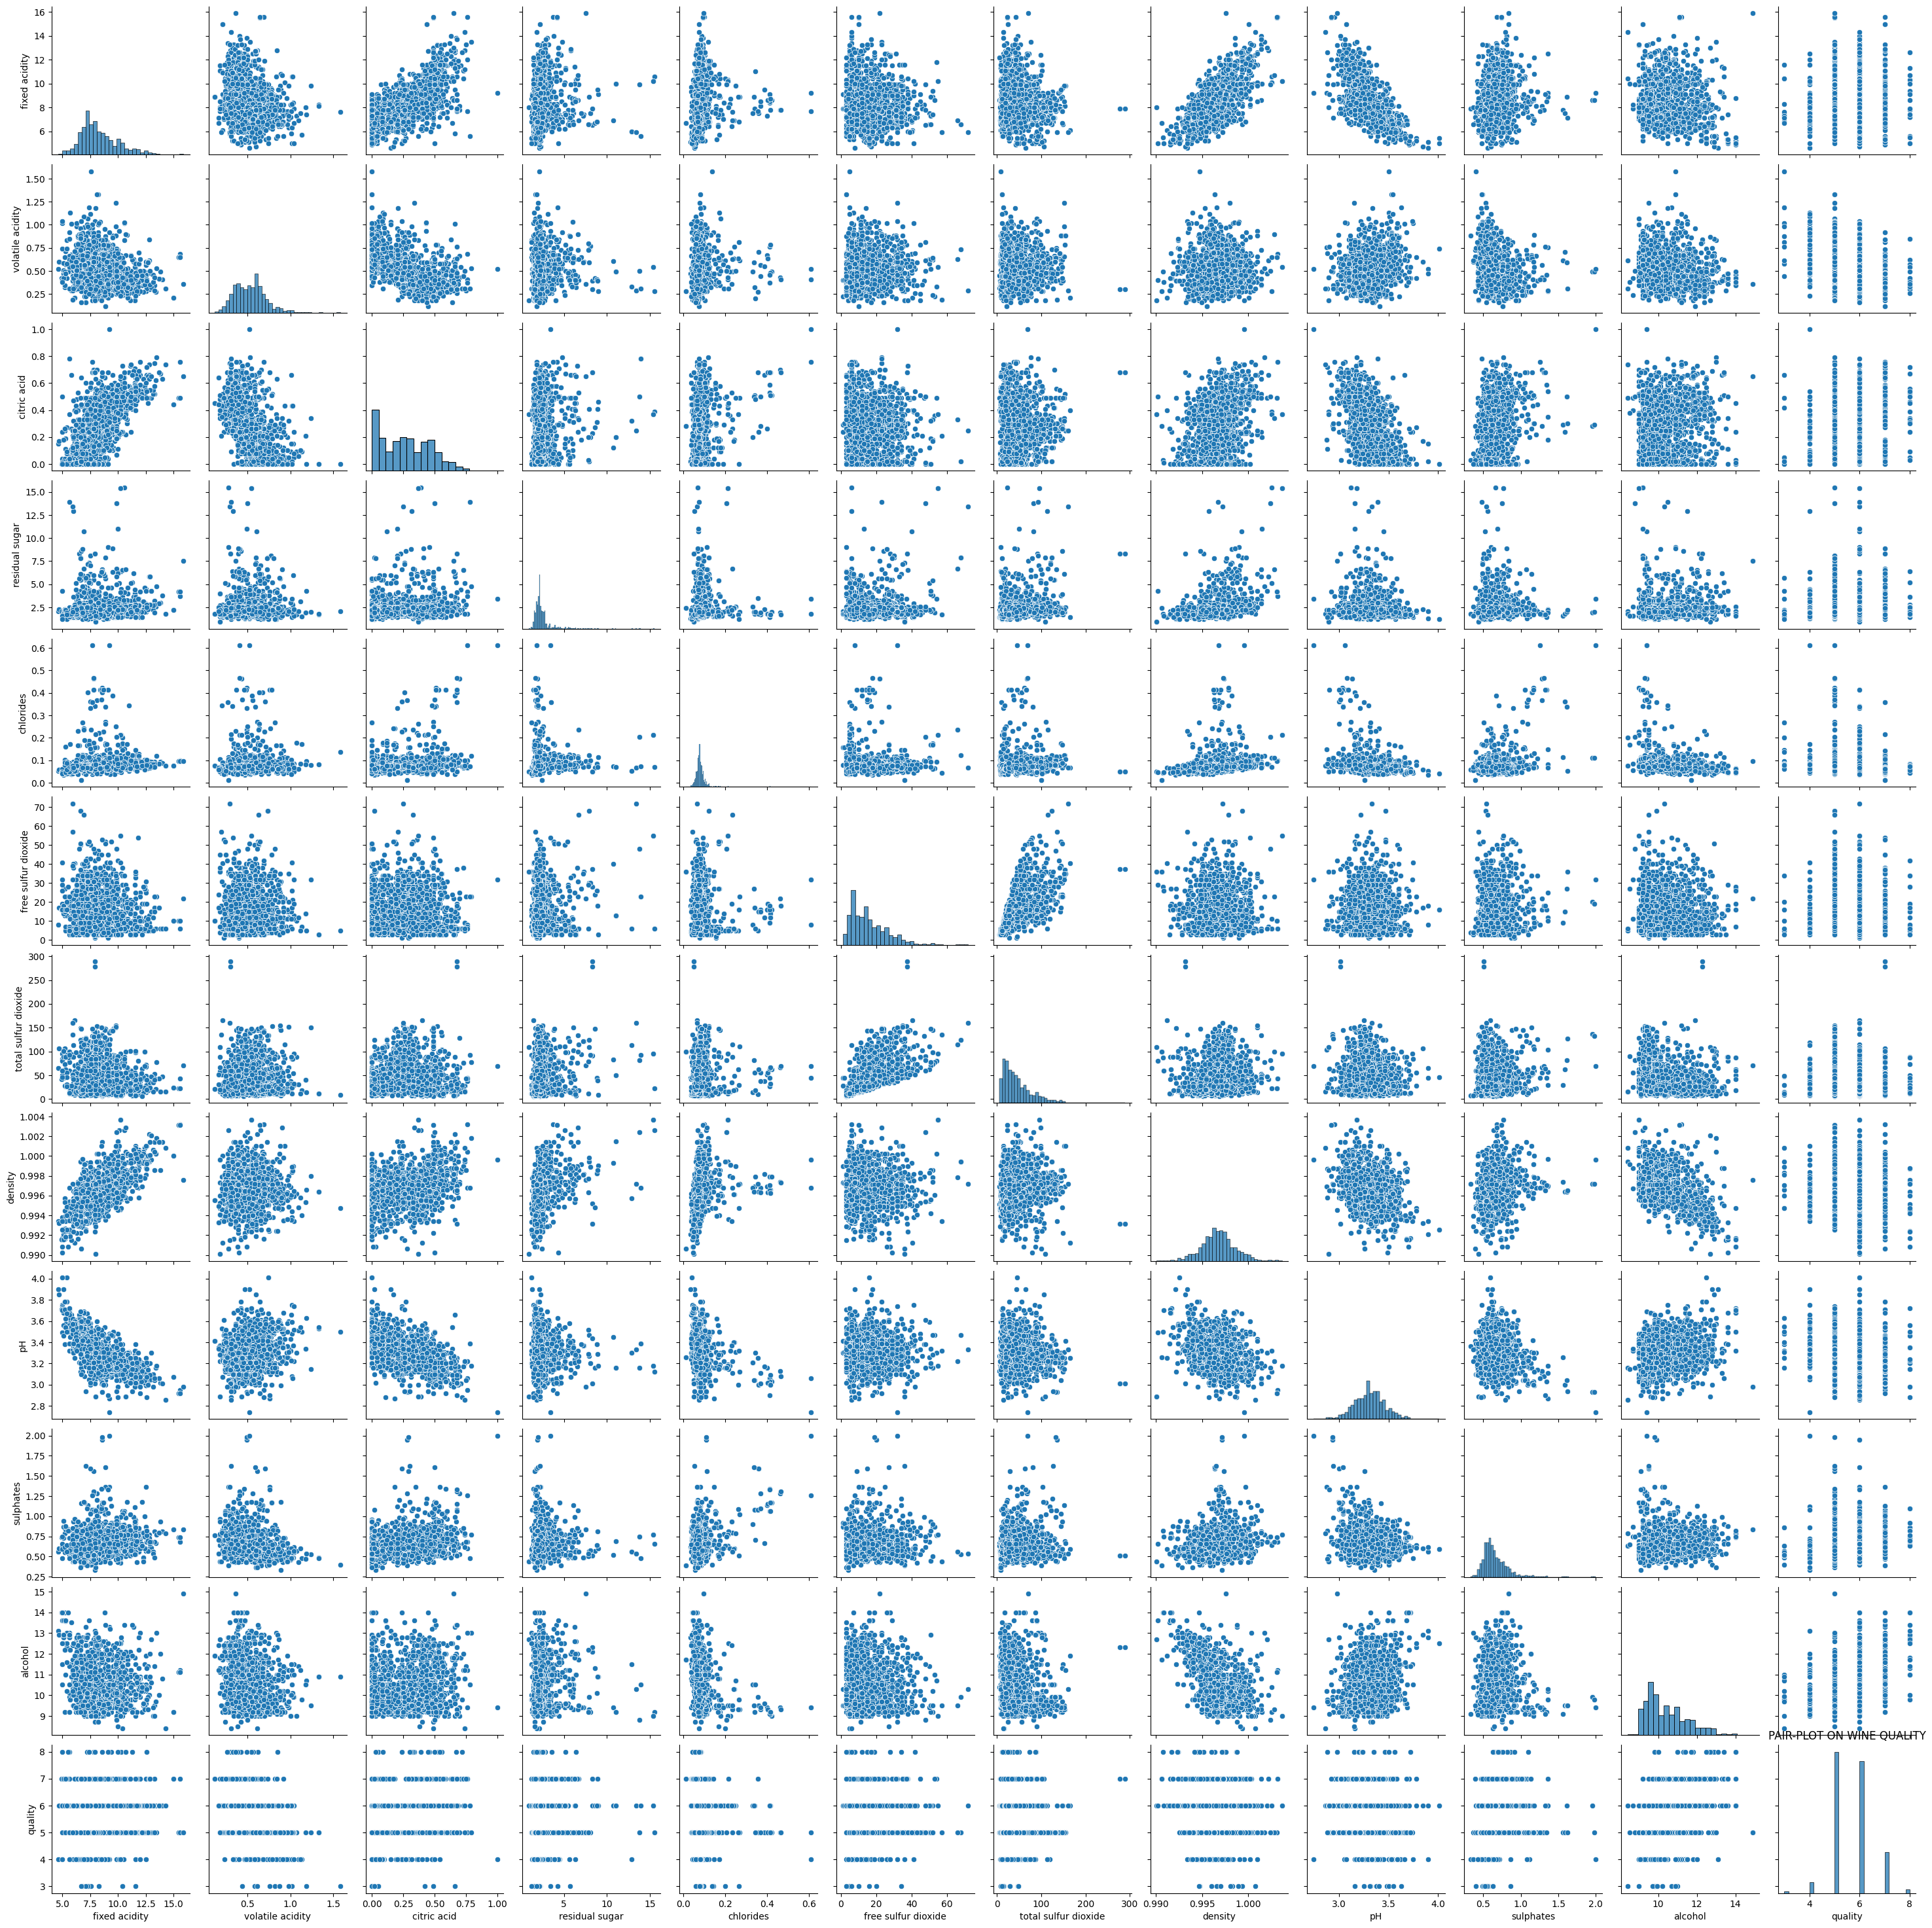

In [ ]:
# pairplot
sns.pairplot(df3)
plt.title("PAIR-PLOT ON WINE QUALITY")
plt.show()

<Figure size 2000x1500 with 0 Axes>

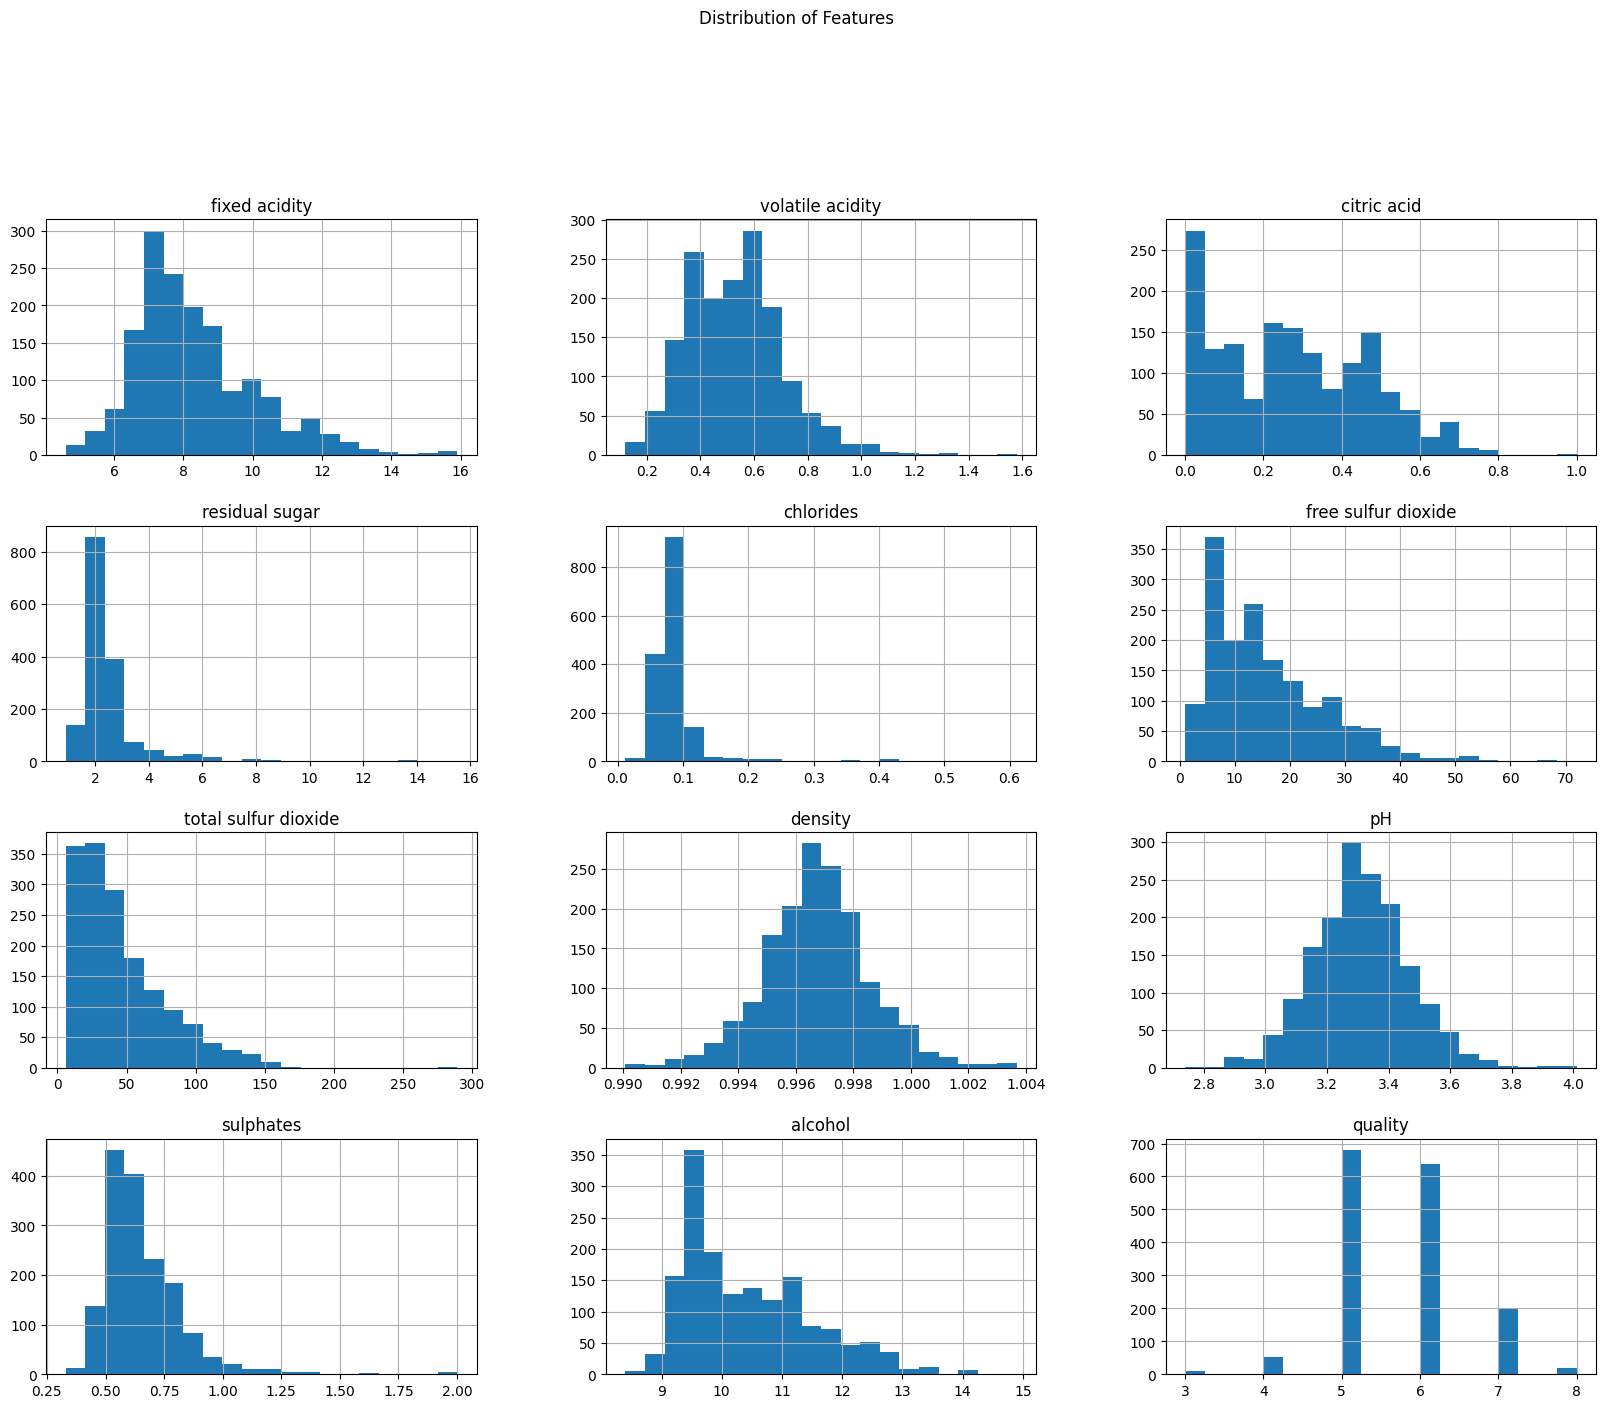

In [ ]:
# hist plot
plt.figure(figsize=(20, 15))
df3.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Features', y=1.02)
plt.show()

# Co-relation using heatmap

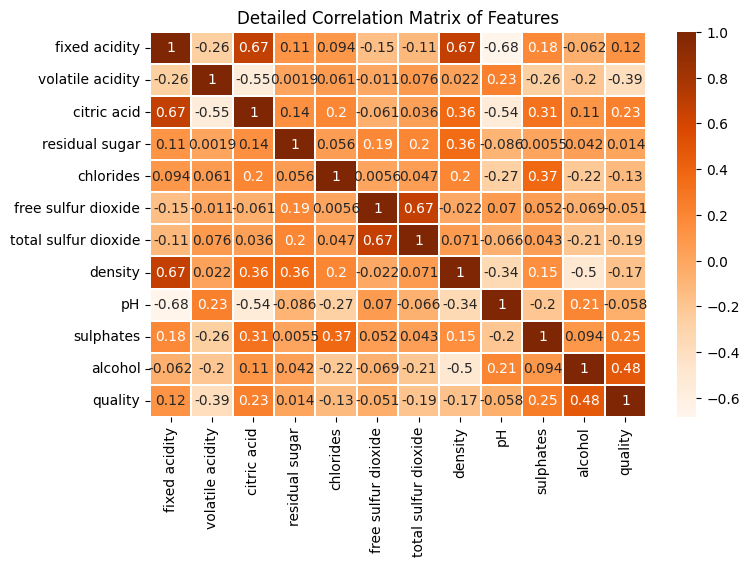

In [ ]:
plt.figure(figsize=(8, 5))
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', linewidths=0.3)
plt.title('Detailed Correlation Matrix of Features')
plt.show()

# Violon plot
### Visualize the distribution and density of features by quality

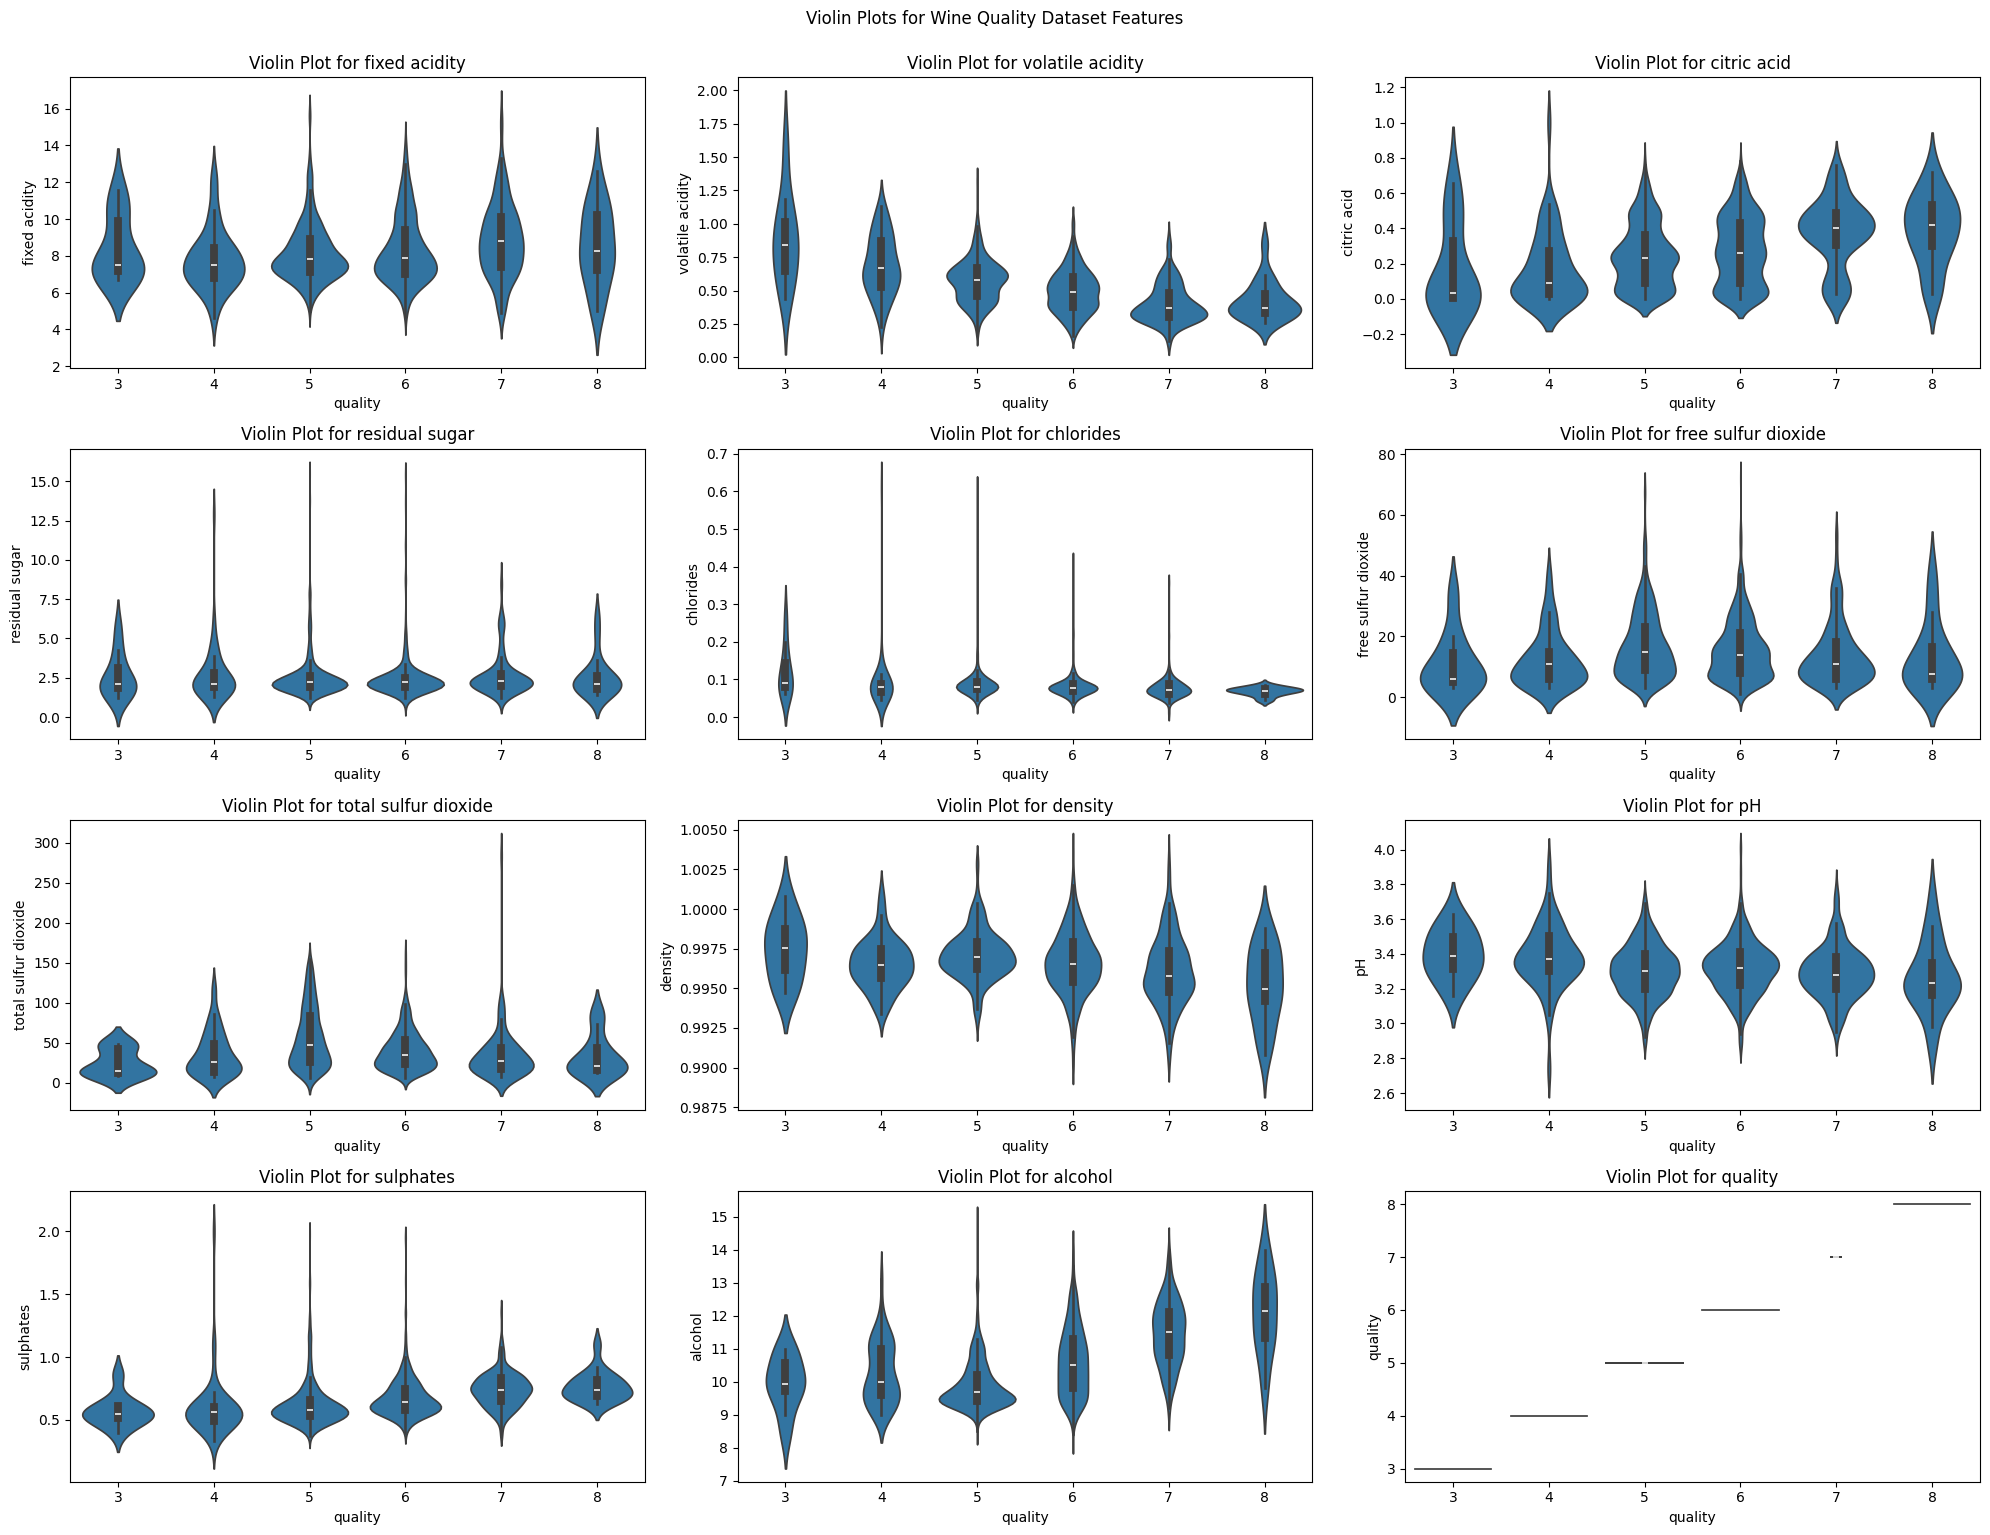

In [ ]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df3.columns, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=df3, y=column, x='quality')
    plt.title(f'Violin Plot for {column}')
plt.tight_layout()
plt.suptitle('Violin Plots for Wine Quality Dataset Features', y=1.02)
plt.show()

# INTERACTION PLOT
### Explore potential interactions between key features and their impact on wine quality

<Figure size 1000x600 with 0 Axes>

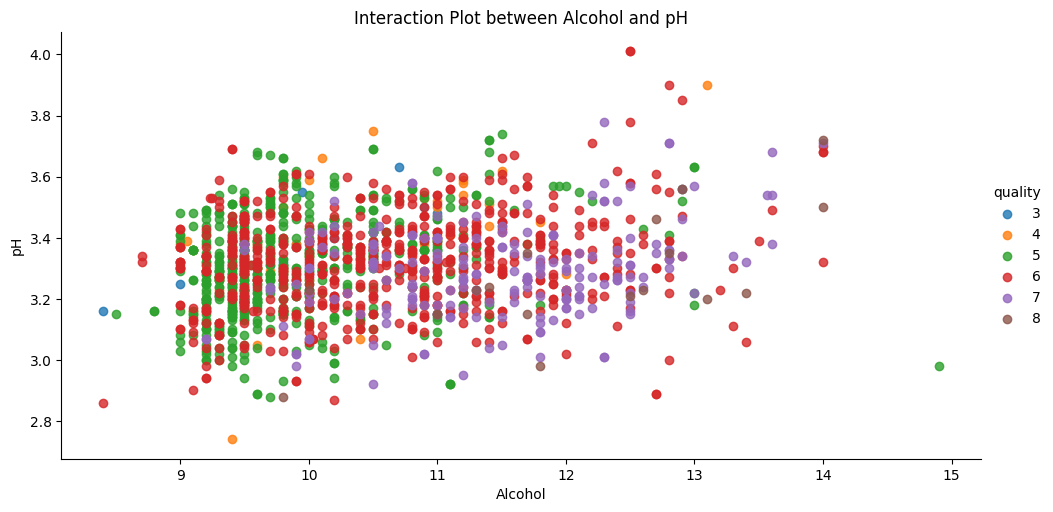

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df3, x='alcohol', y='pH', hue='quality', fit_reg=False, aspect=2)
plt.title('Interaction Plot between Alcohol and pH')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.show()

# count plot
### Visualize the counts of categorical features by quality.

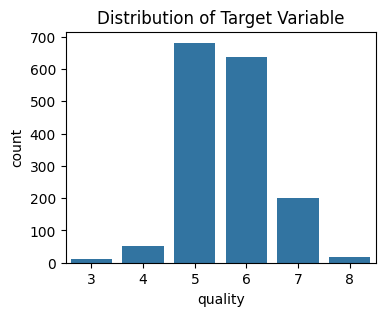

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df3, x='quality')
plt.title('Distribution of Target Variable')
plt.show()

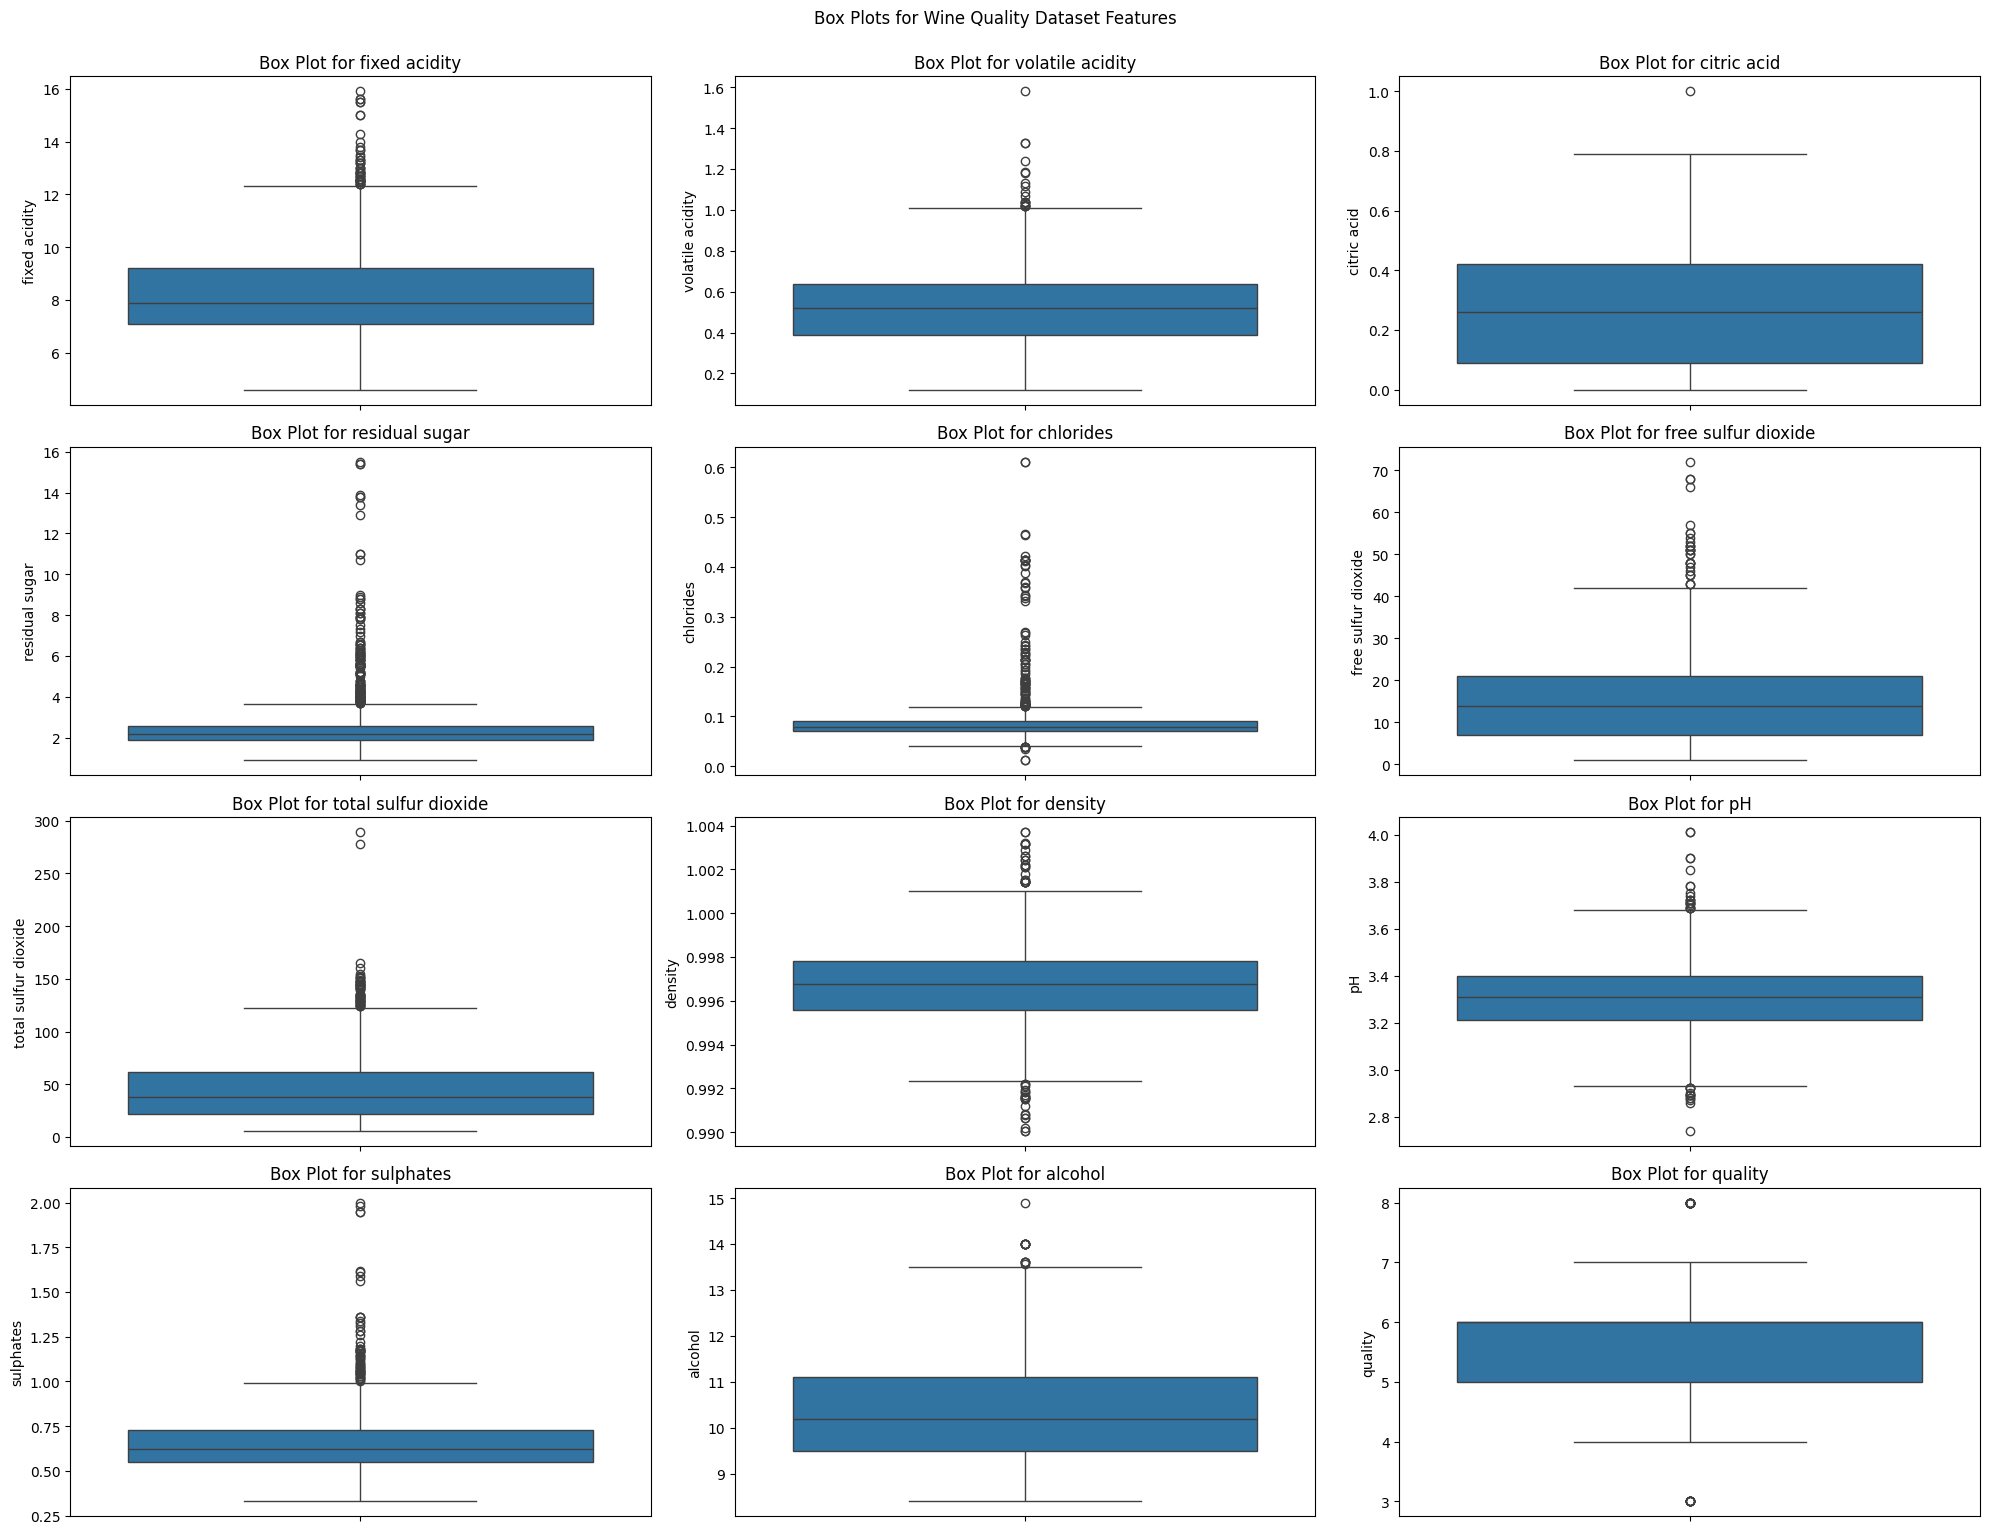

In [ ]:
# Set the size of the plot
plt.figure(figsize=(20, 15))

# Create box plots for each feature
for i, column in enumerate(df3.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df3, y=column)
    plt.title(f'Box Plot for {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.suptitle('Box Plots for Wine Quality Dataset Features', y=1.02)
plt.show()

# Function to calculate the percentage of outliers

In [ ]:
def calculate_outliers_percentage(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        outliers[column] = (outliers[column] / data.shape[0]) * 100
    return outliers

# Calculate the percentage of outliers
outliers_percentage = calculate_outliers_percentage(df3)

# Print the percentage of outliers for each feature
for column, percentage in outliers_percentage.items():
    print(f"Column {column}: {percentage:.2f}% outliers")


Column fixed acidity: 3.06% outliers
Column volatile acidity: 1.19% outliers
Column citric acid: 0.06% outliers
Column residual sugar: 9.69% outliers
Column chlorides: 7.00% outliers
Column free sulfur dioxide: 1.88% outliers
Column total sulfur dioxide: 3.44% outliers
Column density: 2.81% outliers
Column pH: 2.19% outliers
Column sulphates: 3.69% outliers
Column alcohol: 0.81% outliers
Column quality: 1.75% outliers


In [ ]:
X = df3.iloc[ : , :-1] # independent variables
y = df3.iloc[ : , -1]  # Target column

# Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Training and Evaluating Support-Vector-Classifier

In [ ]:
svc_model = SVC(kernel='rbf', probability=True)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
# model prediction
y_pred_svc = svc_model.predict(X_test)

In [ ]:
# Evaluateing model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  2  8  0  0]
 [ 0  0 66 64  0  0]
 [ 0  0 36 96  0  0]
 [ 0  0  5 36  1  0]
 [ 0  0  1  4  0  0]]


In [ ]:
# Classification report
print("Classification report:")
print(classification_report(y_test, y_pred_svc))

Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.51      0.55       130
           6       0.46      0.73      0.56       132
           7       1.00      0.02      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.51       320
   macro avg       0.34      0.21      0.19       320
weighted avg       0.56      0.51      0.46       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cv_scores_svc = cross_val_score(svc_model, X, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy (SVC): {np.mean(cv_scores_svc)}')

Cross-Validation Accuracy (SVC): 0.5002948113207547


# Supprot-Vector-Regressor

In [ ]:
from scipy.stats import jarque_bera, pearsonr
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [ ]:
# Define independent variables (X) and dependent variable (y)
X_reg = df3.iloc[:, :-1]  # All columns except the last one
y_reg = df3.iloc[:, -1]   # The last column (quality)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_svr)
mae = mean_absolute_error(y_test_reg, y_pred_svr)
rmse = np.sqrt(mse)
mpe = np.mean((y_pred_svr - y_test_reg) / y_test_reg) * 100
mape = np.mean(np.abs((y_pred_svr - y_test_reg) / y_test_reg)) * 100
r2 = r2_score(y_test_reg, y_pred_svr)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Percentage Error (MPE): {mpe}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 0.4020084460245427
Mean Absolute Error (MAE): 0.5022126416292931
Root Mean Squared Error (RMSE): 0.6340413598690094
Mean Percentage Error (MPE): -0.020575364384384995%
Mean Absolute Percentage Error (MAPE): 8.902528813120226%
R-squared: 0.3848433946575237


# Conclusion

### In this project, we successfully developed predictive models to classify wine quality, with a specific emphasis on alcohol content. Through extensive data preprocessing and exploratory data analysis, we identified key patterns and relationships in the dataset. The models, evaluated using various metrics like accuracy, precision, and recall, demonstrated their ability to distinguish between different wine quality levels. This project highlights the significance of alcohol content and other physicochemical properties in determining wine quality and underscores the importance of thorough data analysis and model evaluation in predictive analytics.